In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Regression

|Hyperparameter	|Typical value|
|---------------|-------------|
|Input layer shape|	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)|
|Hidden layer(s)|	Problem specific, minimum = 1, maximum = unlimited|
|Neurons per hidden layer|	Problem specific, generally 10 to 100|
|Output layer shape|	Same shape as desired prediction shape (e.g. 1 for house price)|
|Hidden activation|	Usually ReLU (rectified linear unit)|
|Output activation|	None, ReLU, logistic/tanh|
|Loss function|	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers|
|Optimizer|	SGD (stochastic gradient descent), Adam|



#### Common ways to improve a deep model



*   Adding layers

*   Increase the number of hidden units

*   Change the activation functions
*   Change the optimization function


*   Change the learning rate

*   Fitting on more data
*   Fitting for longer


#### Sequential Model in Regression

In [3]:
raw_dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
dataset = raw_dataset.copy()

In [5]:
"""dataset = pd.get_dummies(data = raw_dataset, columns = ["sex", "smoker", "region"])
dataset.head()
""";

In [6]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    )

In [7]:
X = dataset.drop("charges", axis=1)
y = dataset["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) # X_test transform by X_train

In [9]:
model_seq1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu", input_shape= [11]),
    tf.keras.layers.Dense(1)
])

model_seq1.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD())

In [10]:
history_seq1 = model_seq1.fit(X_train_normal, y_train, epochs = 100, validation_data = (X_test_normal, y_test))

Epoch 1/100
34/34 [==============================] - 2s 18ms/step - loss: 13345.1377 - val_loss: 12966.1357
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 13342.0557 - val_loss: 12961.4199
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13334.0098 - val_loss: 12947.9229
Epoch 4/100
34/34 [==============================] - 0s 8ms/step - loss: 13309.8965 - val_loss: 12906.7549
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13235.5537 - val_loss: 12779.0264
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13004.3203 - val_loss: 12382.0498
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 12286.6318 - val_loss: 11175.6982
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 10674.0264 - val_loss: 9445.7129
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 9045.5762 - val_loss: 8578.0322
Epoch 10/100
34/34 [==================

<Axes: >

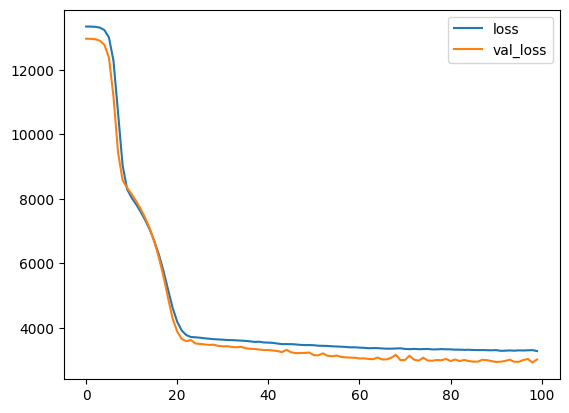

In [11]:
pd.DataFrame(history_seq1.history).plot() #Underfit

#### Another way sequential model

In [12]:
model_seq2 = tf.keras.Sequential([])

model_seq2.add(tf.keras.layers.Dense(50, activation = "relu", input_shape = [11])),
model_seq2.add(tf.keras.layers.Dense(50, activation = "relu")),
model_seq2.add(tf.keras.layers.Dense(1))

model_seq2.compile(loss = tf.keras.losses.MAE,
                   optimizer = tf.keras.optimizers.Adam())


In [13]:
history_seq2 = model_seq2.fit(X_train_normal,
               y_train,
               epochs = 1500,
               validation_data = (X_test_normal, y_test))

Epoch 1/1500
34/34 [==============================] - 1s 8ms/step - loss: 13344.9678 - val_loss: 12965.8428
Epoch 2/1500
34/34 [==============================] - 0s 4ms/step - loss: 13340.9580 - val_loss: 12958.6699
Epoch 3/1500
34/34 [==============================] - 0s 3ms/step - loss: 13327.3008 - val_loss: 12935.4893
Epoch 4/1500
34/34 [==============================] - 0s 4ms/step - loss: 13290.6035 - val_loss: 12881.2646
Epoch 5/1500
34/34 [==============================] - 0s 4ms/step - loss: 13215.3662 - val_loss: 12780.7500
Epoch 6/1500
34/34 [==============================] - 0s 3ms/step - loss: 13086.6641 - val_loss: 12619.0381
Epoch 7/1500
34/34 [==============================] - 0s 3ms/step - loss: 12889.6611 - val_loss: 12382.7715
Epoch 8/1500
34/34 [==============================] - 0s 4ms/step - loss: 12612.0684 - val_loss: 12057.8721
Epoch 9/1500
34/34 [==============================] - 0s 4ms/step - loss: 12239.2637 - val_loss: 11633.3779
Epoch 10/1500
34/34 [=======

<Axes: >

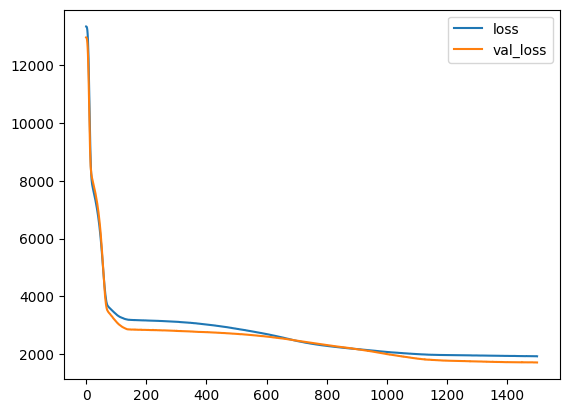

In [14]:
pd.DataFrame(history_seq2.history).plot()

#### Functional API

In [15]:
inputs = tf.keras.Input(shape = (11))
dense1 = tf.keras.layers.Dense(100, activation = "relu")(inputs)
dense2 = tf.keras.layers.Dense(100, activation = "relu")(dense1)
dense3 = tf.keras.layers.Dense(100, activation = "relu")(dense2)
outputs= tf.keras.layers.Dense(1)(dense3)


model_functional = tf.keras.Model(inputs = inputs, outputs = outputs)

model_functional.compile(loss = tf.keras.losses.MAE,
                         optimizer = tf.keras.optimizers.Adam())


In [16]:
history_functional = model_functional.fit(X_train_normal,
                                          y_train,
                                          epochs = 3000,
                                          validation_data = (X_test_normal, y_test))


Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 8ms/step - loss: 1806.6888 - val_loss: 1601.1830
Epoch 502/3000
34/34 [==============================] - 0s 7ms/step - loss: 1807.9950 - val_loss: 1601.3242
Epoch 503/3000
34/34 [==============================] - 0s 8ms/step - loss: 1811.0736 - val_loss: 1605.8529
Epoch 504/3000
34/34 [==============================] - 0s 4ms/step - loss: 1808.8248 - val_loss: 1591.7336
Epoch 505/3000
34/34 [==============================] - 0s 4ms/step - loss: 1798.4008 - val_loss: 1591.4292
Epoch 506/3000
34/34 [==============================] - 0s 4ms/step - loss: 1804.7964 - val_loss: 1591.3191
Epoch 507/3000
34/34 [==============================] - 0s 4ms/step - loss: 1799.3080 - val_loss: 1608.3131
Epoch 508/3000
34/34 [==============================] - 0s 4ms/step - loss: 1801.6798 - val_loss: 1593.0916
Epoch 509/3000
34/34 [==============================] - 0s 4ms/step - loss: 1806.9954 - val_loss: 15

<Axes: >

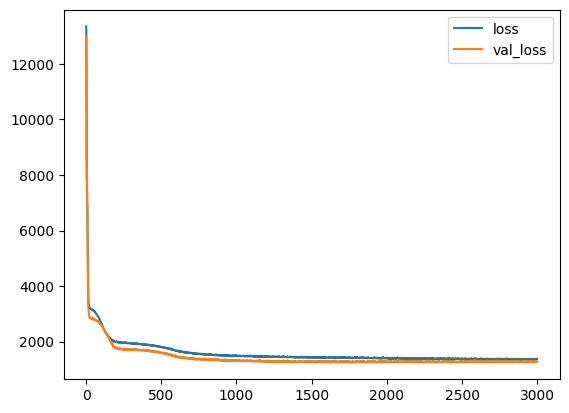

In [17]:
pd.DataFrame(history_functional.history).plot()

<Axes: >

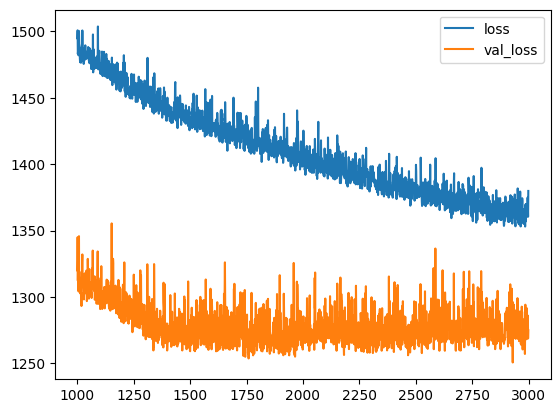

In [18]:
pd.DataFrame(history_functional.history).iloc[1000:].plot()